In [138]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

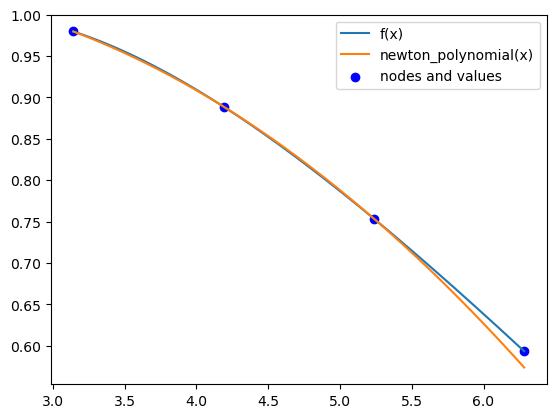

0.34975106464875194
0.5282547822407186


In [140]:
#1)
def f(x):
    return np.sin(np.sqrt(x))
    
#въвеждане на данните
nodes = np.linspace(np.pi, 2 * np.pi, 4)
values = f(nodes)
n = nodes.size - 1

#намиране на разделените разлики
def divided_newton(nodes, values):
    if nodes.size == 1:
        return values[0]
    return (divided_newton(nodes[1 : ], values[1 :]) - divided_newton(nodes[ : -1], values[ : - 1])) / (nodes[-1] - nodes[0])
#формула на Нютон
def newton_poly(x, nodes, values, n):
    poly = 0
    mult = 1
    for k in range(n):
        poly += (divided_newton(nodes[ : k + 1], values[ : k + 1]) * mult)
        mult *= (x - nodes[k])
    return poly

#чертеж на графиката на полинома на интерполация
x_axis = np.linspace(np.pi, 2 * np.pi, 1000)
poly = newton_poly(x_axis, nodes, values, n)
plt.plot(x_axis, f(x_axis), x_axis, poly)
plt.scatter(nodes, values, color = 'blue')
plt.legend(['f(x)', 'newton_polynomial(x)', 'nodes and values'])
plt.show()

#approximate_value = newton_poly(np.pi / 6, nodes, values, n)
#print(approximate_value)
#f(np.pi / 6)

#Намиране на абсолютната грешка
def absolute_error(x):
    return np.abs(f(x) - newton_poly(np.pi / 6, nodes, values, n))

#Намиране на относителната грешка
def approximate_error(x):
    return absolute_error(x) / f(x)

print(absolute_error(np.pi / 6))
print(approximate_error(np.pi / 6))

#Както може да видим абсолютната и относителната 
#грешка в точката np.pi / 6 не са сравнително големи
#(освен в края на интервала),но тъй като
#ние работим в интервала [pi, 2pi],са относително
#по - големи от желаото от нас приближение

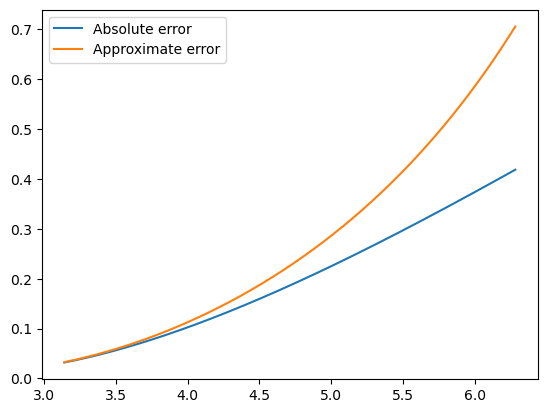

In [142]:
#Нека изобразим съответните грешки на графика, за да видим колко са съществени

plt.plot(x_axis, absolute_error(x_axis), x_axis, approximate_error(x_axis))
plt.legend(['Absolute error', 'Approximate error'])
plt.show()
#Съответно абсолютната грешка не расте толкова бързо колкото относителната.

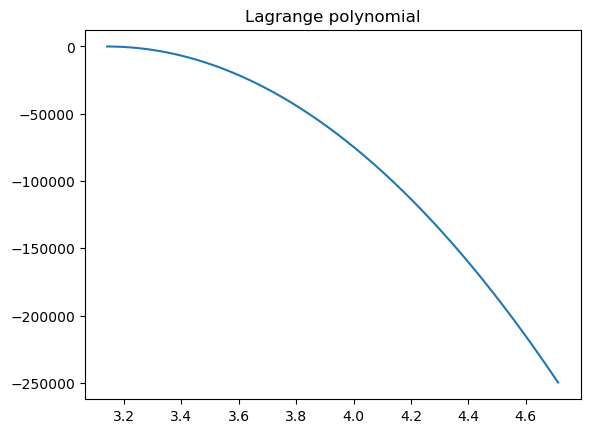

The k-th dev is  16*cos(2*x)


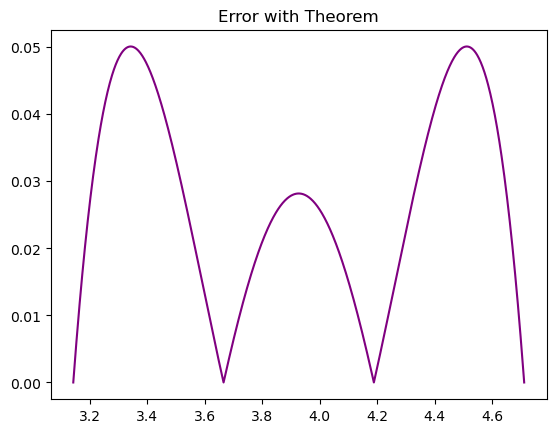

Error with 3.6 is 0.01304872463756781


In [144]:
#2)
def f(x):
    return np.cos(2 * x)

#въвеждане на стойностите
nodes = np.array([np.pi, 7 * np.pi / 6, 4 * np.pi / 3, 3 * np.pi / 2])
values = f(nodes)
x_axis = np.linspace(np.pi, 3 * np.pi / 2, 1000) #за чертането на графиките
n = nodes.size - 1 

#Lagrange
def lkn(x, nodes, n, k):
    res = 1
    for i in range(n):
        if i != k:
            res *= ((x - x[i]) / (x[k] - x[i]))
    return res
    
def lagrange_polynomial(x, nodes, values, n):
    polynomial = 0
    for k in range(n):
        polynomial += (values[k] * lkn(x, nodes, n, k))
    return polynomial

#чертеж на полинома на Лагранж за по-добра представа на задачата
poly = lagrange_polynomial(x_axis, nodes, values, n)
plt.plot(x_axis, poly)
plt.title('Lagrange polynomial')
plt.show()

#ГРЕШКАТА
#намиране на производната
x = sp.Symbol('x')
expr = sp.cos(2 * x)
dev_1 = sp.diff(expr, x) #първа пеоизводна
dev_2 = sp.diff(dev_1, x)#втора пеоизводна
dev_3 = sp.diff(dev_2, x)#трета пеоизводна
dev_4 = sp.diff(dev_3, x)#k-та (4-та) пеоизводна
print('The k-th dev is ', dev_4)
k = 4
def dev(x):
    return 16 * np.cos(2 * x)

#намиране на грешката по теоремата за оценка на грешка
def theorem_error(x, e, k):
    mult = (x - nodes[0]) * (x - nodes[1]) * (x - nodes[2]) * (x - nodes[3])
    return np.abs((dev(e) / math.factorial(k)) * mult)

e =  3 * np.pi / 2 #стойността в която dev(x) има най-голяма стойност
#чертеж на грешката, която сме намерили
error = theorem_error(x_axis, e, k)
plt.plot(x_axis, error, color = 'purple')
plt.title('Error with Theorem')
plt.show()

#грешка при 3,6
error_value = theorem_error(3.6, e, k)
print('Error with 3.6 is', error_value)

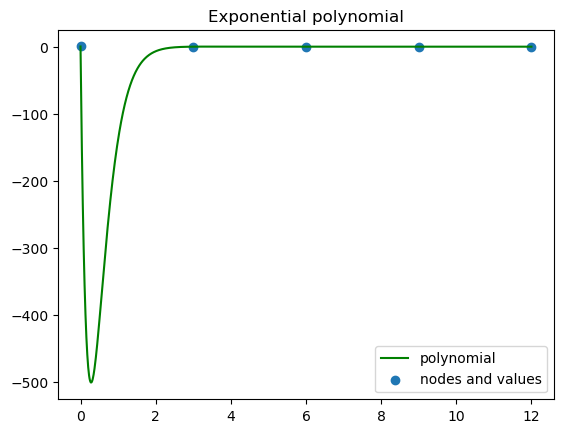

In [146]:
#3)
#Тъй като от таблицата можем да видим, че данните
#намаляват експоненционално много бързо, то
#най-подходящ базис би бил 3.
#Както сме разглеждали вече на семинари и лекции,
#при данни които растата много бързо, най-подходящ базис
#би бил този от експоненционалните полиноми,
#то следователно при много бързо намаляващи данни
#най-подходящ би бил 3.

#въвеждане на данните
xi = np.arange(0, 13, 3)
yi = np.array([0.3, 0.025, 0.003, 0.00008, 0.0000032])
n = xi.size

#намиране на матрицата А
A = np.zeros([n, n])
def fill_exponential_matrix(A, xi, n):
    for i in range(n):
        for j in range(n):
            A[i][j] = np.exp((-1) * j * xi[i])

fill_exponential_matrix(A, xi, n)

#намиране на вектор стълбът с решения
sol = np.linalg.solve(A, yi)
sol

#намиране на полинима
def exponential_polynomial(x, sol):
    polynomial = 0
    for i in range(sol.size):
        polynomial += (sol[i] * np.exp((-1) * x * i))
    return polynomial

#чертане на графиката
x_axis = np.linspace(0, 12, 1000)
poly = exponential_polynomial(x_axis, sol)
plt.plot(x_axis, poly, color = 'green')
plt.scatter(xi, yi)
plt.title('Exponential polynomial')
plt.legend(['polynomial', 'nodes and values'])
plt.show()